In [1]:
from cartopy import config
import cartopy.crs as ccrs
import matplotlib.colors as plt_cols

import matplotlib.pyplot as plt
import numpy as np
import pandas
import pickle
import time, json, requests, pprint, copy, math, dateutil
from datetime import datetime, timedelta
from argovisHelpers import helpers as avh

import os

In [2]:
API_KEY=''

API_PREFIX_all = 'https://argovis-api.colorado.edu/' #'https://argovisbeta01.colorado.edu/api/'
API_PREFIX_drifters = API_PREFIX_all 

In [3]:
fpath = os.path.expanduser('~/Downloads/')

In [4]:
startDate = '2019-08-13T00:00:00Z'
endDate = '2019-08-31T00:00:00Z'
# startDate = '2004-01-01T00:00:00Z'
# endDate = '2022-12-31T00:00:00Z'


dx = 1
dy = 1

x_edges = np.arange(-180,181,dx)
y_edges = np.arange(-90,91,dy)



In [5]:
# argo = requests.get(url,headers=headers).json()

In [6]:
def map_count_in_bins(name,x_edges,y_edges,dx,dy,fpath,startDate,endDate,vmin_map=1,vmax_map=1000):
    d = globals()[name] 
    lons = d['longitudes']#[x[1] for x in d]
    lats  = d['latitudes']#[x[2] for x in d]
    datetimes  = d['datetimes'] #[datetime.strptime(x[3][0:18]+'Z',"%Y-%m-%dT%H:%M:%SZ") for x in d]
    
    fig = plt.figure(figsize=(21, 7))
    
    h = np.histogram2d(lons, lats,[x_edges, y_edges])
    ax = plt.axes(projection=ccrs.PlateCarree())

    plt.pcolormesh(x_edges[0:-1]+dx/2, y_edges[0:-1]+dy/2, h[0].transpose(),  #60,
             transform=ccrs.PlateCarree(),norm=plt_cols.LogNorm(),vmin=vmin_map,vmax=vmax_map)

    ax.stock_img()
    ax.coastlines()
    
    plt.colorbar()

    plt.savefig(fpath+name+startDate[0:10]+'_'+endDate[0:10]+'.png')
    plt.show()

tc
2023-02-15 23:43:39.626040
2023-02-15 23:43:40.087823


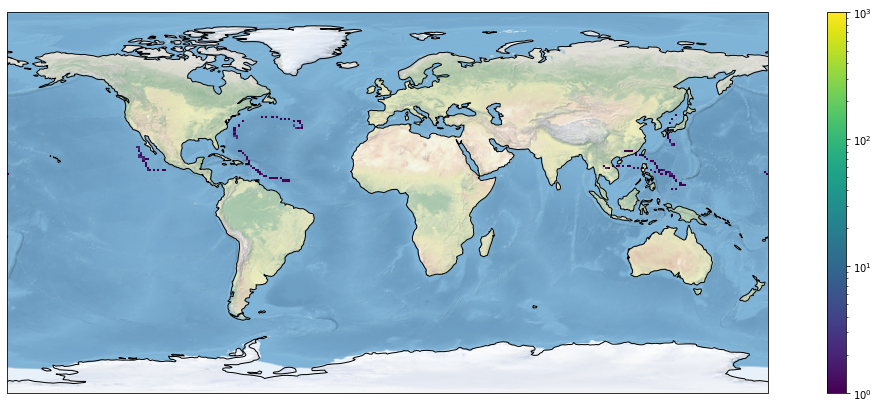

2023-02-15 23:43:41.177458
cchdo
2023-02-15 23:43:41.177625
2023-02-15 23:43:42.078629


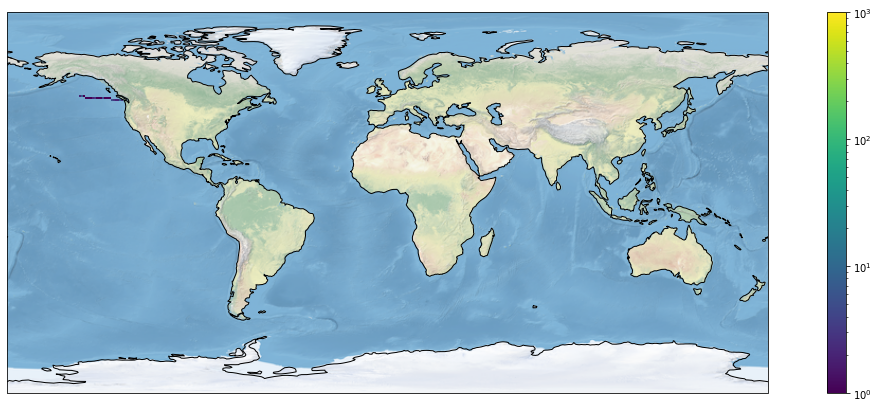

2023-02-15 23:43:42.806385
argo
2023-02-15 23:43:42.806499
2023-02-15 23:45:13.220219


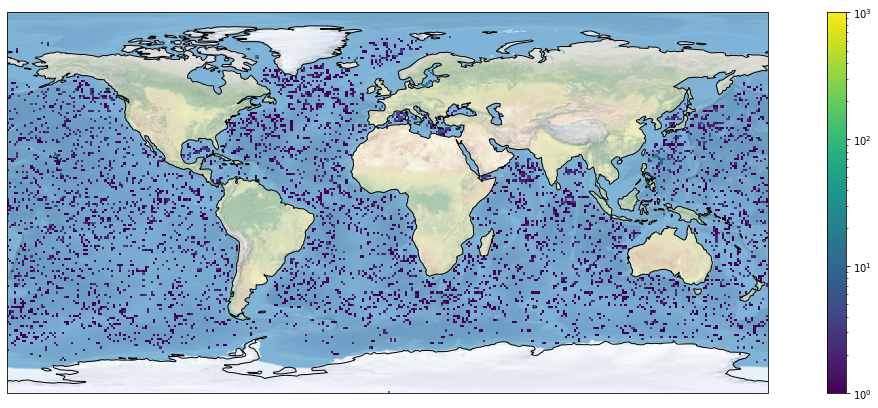

2023-02-15 23:45:13.972161
drifters
2023-02-15 23:45:13.972196


KeyError: 0

In [7]:
params = {
        'startDate': startDate,
        'endDate': endDate,
        'compression': 'minimal'
    }

for collection in ['tc','cchdo','argo','drifters']: 
    print(collection)
    if collection == 'drifters':
        API_PREFIX = API_PREFIX_drifters
    else:
        API_PREFIX = API_PREFIX_all
    print(datetime.now())
    globals()[collection] = avh.query(collection, options=params, apikey=API_KEY, apiroot=API_PREFIX)
    print(datetime.now())
    mydict_name = 'df_'+collection
    globals()[mydict_name] = pandas.DataFrame(globals()[collection])
    #print(globals()[mydict_name])
    globals()[mydict_name]['id'] = globals()[mydict_name].pop(0)
    globals()[mydict_name]['longitudes'] = globals()[mydict_name].pop(1)
    globals()[mydict_name]['latitudes'] = globals()[mydict_name].pop(2)
    globals()[mydict_name]['datetimes'] = globals()[mydict_name].pop(3)
    if len(globals()[mydict_name].keys()) > 4:
        globals()[mydict_name]['tags'] = globals()[mydict_name].pop(4)
    #print(globals()[mydict_name])

    output = open(fpath+mydict_name+startDate[0:10]+'_'+endDate[0:10]+'.pkl', 'wb')
    pickle.dump(globals()[mydict_name], output)
    output.close()
    map_count_in_bins(name=mydict_name,x_edges=x_edges,y_edges=y_edges,dx=dx,dy=dy, \
                      fpath=fpath,startDate=startDate,endDate=endDate,vmin_map=1,vmax_map=1000)
    print(datetime.now())
    
# longitudes = [x['geolocation']['coordinates'][0] for x in d]
# latitudes  = [x['geolocation']['coordinates'][1] for x in d]

In [ ]:
for name in ['df_argo','df_cchdo']: # ['df_tc','df_argo','df_cchdo','df_drifters']:
    if name not in globals():
        globals()[name] = pickle.load( open( fpath+name+startDate[0:10]+'_'+endDate[0:10]+'.pkl', "rb" ) )
    map_count_in_bins(name=name,x_edges=x_edges,y_edges=y_edges,dx=dx,dy=dy, \
                      fpath=fpath,startDate=startDate,endDate=endDate,vmin_map=1,vmax_map=1000)
        

In [ ]:
# df_argo = pickle.load( open( fpath+"df_argo.pkl", "rb" ) )